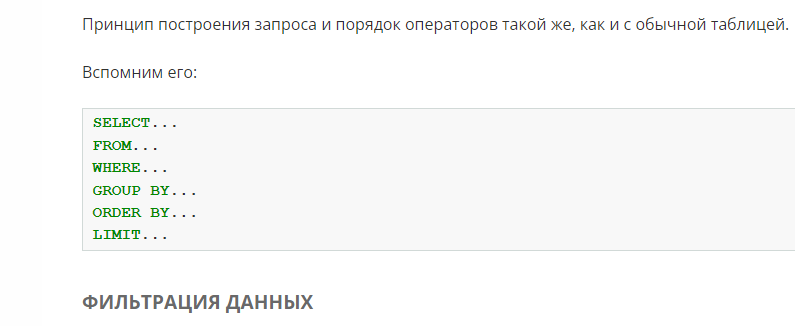


К соединённым таблицам применимы функции фильтрации данных.

Например, можно вывести id матчей, в которых команда Arsenal была гостевой.

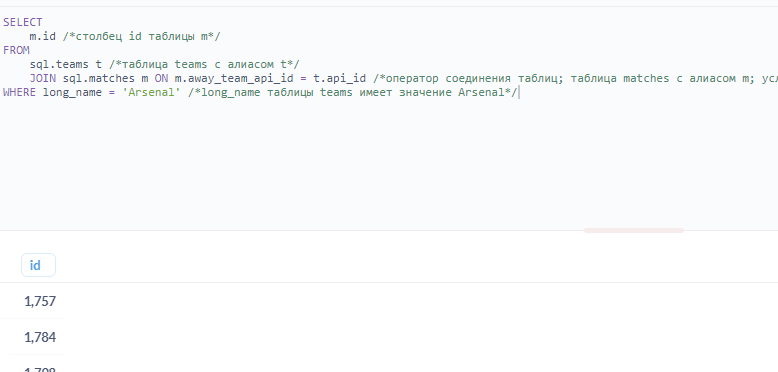

Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.

Например, результат запроса

Одна часть — таблица matches с алиасом m, вторая — teams с алиасом t, но после соединения они являются одной таблицей.

Таким образом, если вы отфильтруете данные по одной части таблицы, то другая, соединённая, часть пропадёт вместе с ней.

Напишите запрос, который выведет полное название команды (long_name), количество голов домашней команды (home_goal) и количество голов гостевой команды (away_goal) в матчах, где домашней командой были команды с коротким названием 'GEN'. Отсортируйте запрос по id матча в порядке возрастания

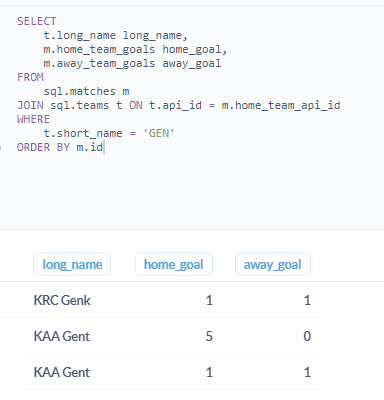

Например, можно оставить только записи, в которых короткое название домашней команды GEN и матчи сезона 2008/2009.

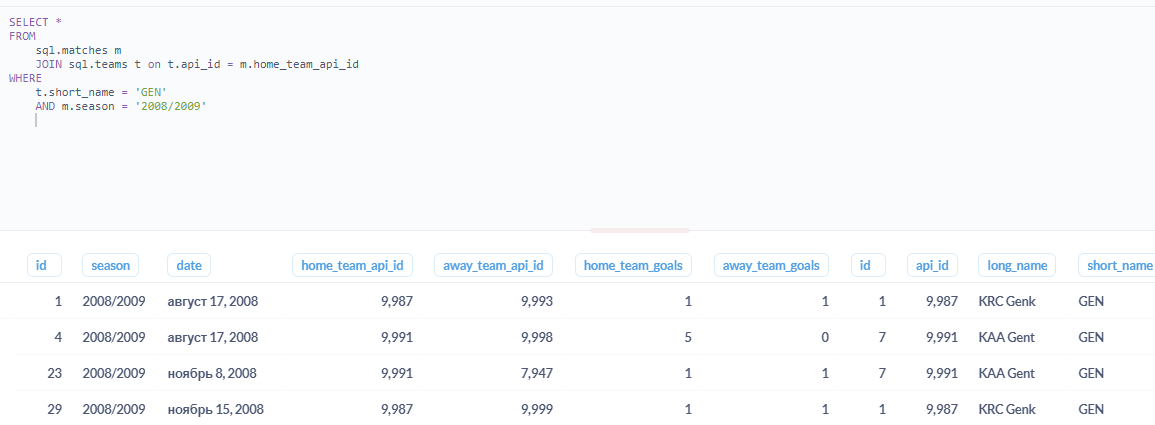

Напишите запрос, чтобы вывести id матчей, короткое название домашней команды (home_short), короткое название гостевой команды (away_short) для матчей сезона 2011/2012, в которых участвовала команда с названием Liverpool. Отсортируйте по id матча в порядке возрастания

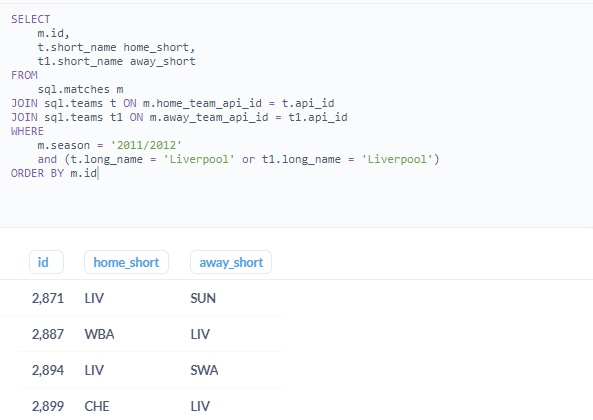

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.

Например, мы можем вывести сумму голов по командам для матчей, где команда выступала в гостях.

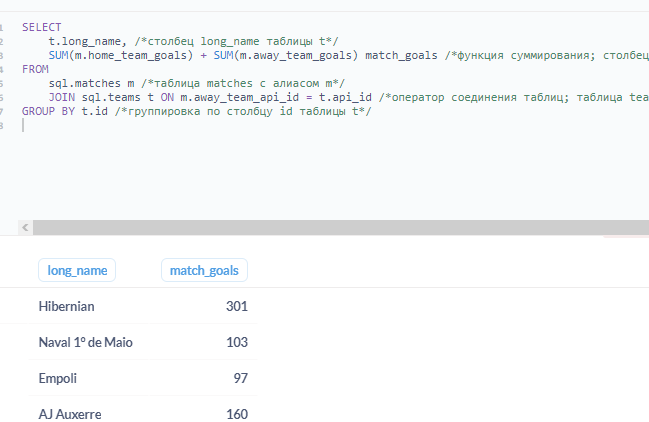

Обратите внимание! В данном запросе была использована группировка по столбцу id таблицы teams, хотя этот столбец не выводится в запросе. Это необходимо для того, чтобы команды с одинаковым названием, если такие найдутся, не группировались между собой. Группировка по названию команды в данном запросе будет неверной, так как есть несколько команд с одинаковым полным названием — мы говорили об этом в начале модуля.

Также, используя агрегатные функции к соединённым таблицам, обращайте внимание на указание алиасов (или таблиц) при группировке и указании столбцов агрегатных функций. В нашей соединённой таблице есть два столбца с названием id, и если бы мы сформировали запрос без указания таблицы, как указано ниже, то...

Мы можем использовать оператор HAVING для фильтрации сгруппированных данных.

Поставим задачу — вывести таблицу с суммарным количеством забитых голов в матчах по командам и сезонам для команд, в которых суммарное количество голов в матчах сезона больше 100.

Для начала посчитаем общее количество голов в матчах по сезонам.

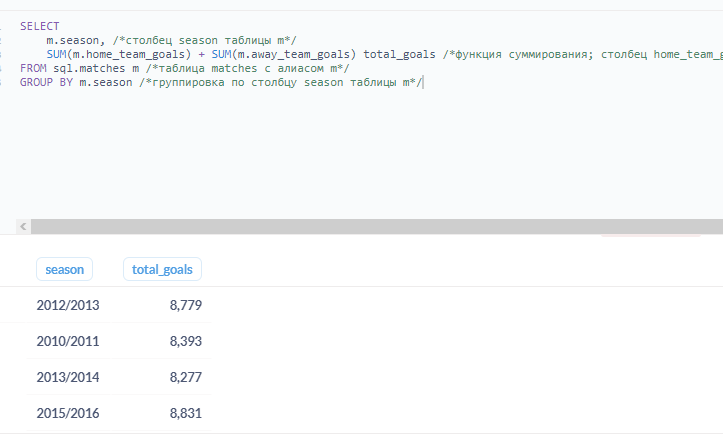

Затем добавим таблицу с командами, группировку по командам и условие фильтрации.

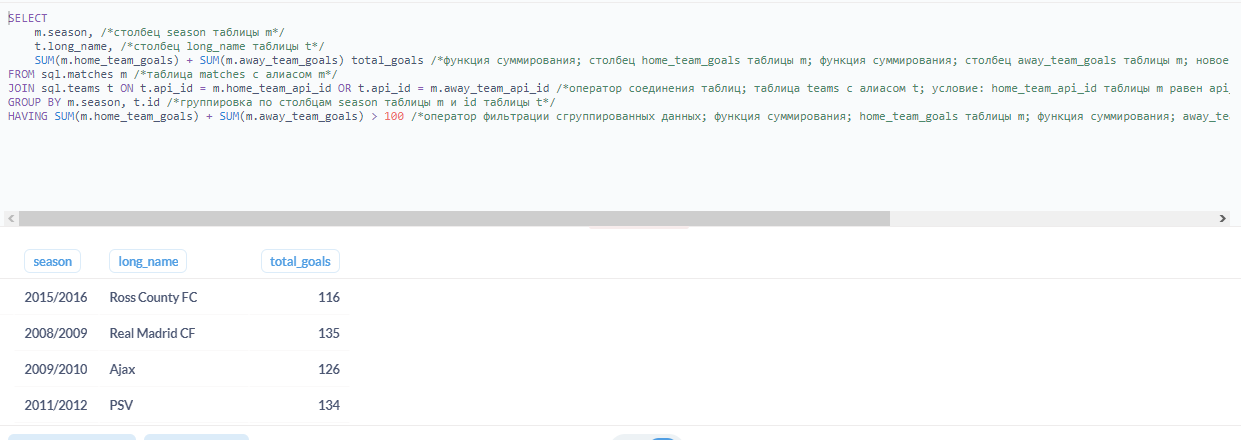

Напишите запрос, с помощью которого можно вывести список полных названий команд, сыгравших в гостях 150 и более матчей. Отсортируйте список по названию команды.

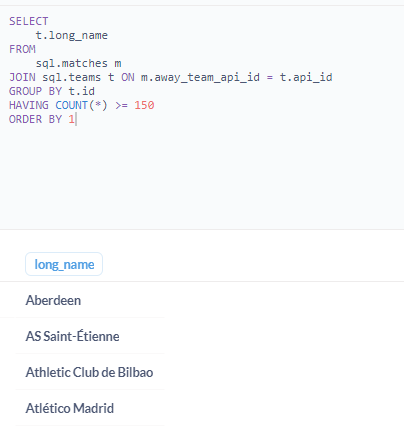

В прошлых юнитах для соединения таблиц мы использовали один оператор — JOIN. В действительности же он не один: существует несколько различных видов соединений (join’ов) — давайте посмотрим какие.

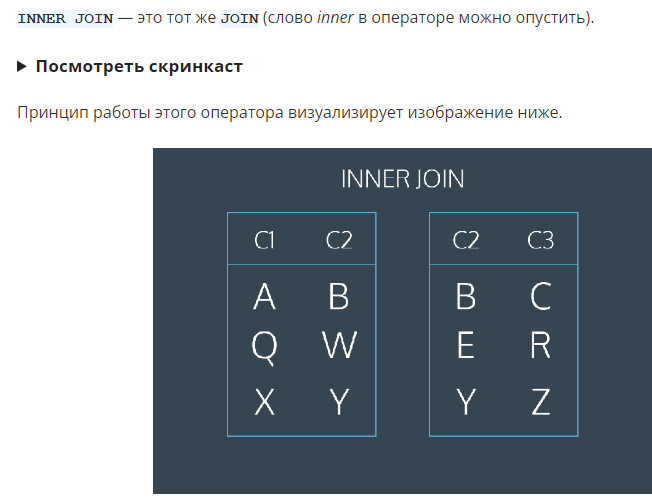

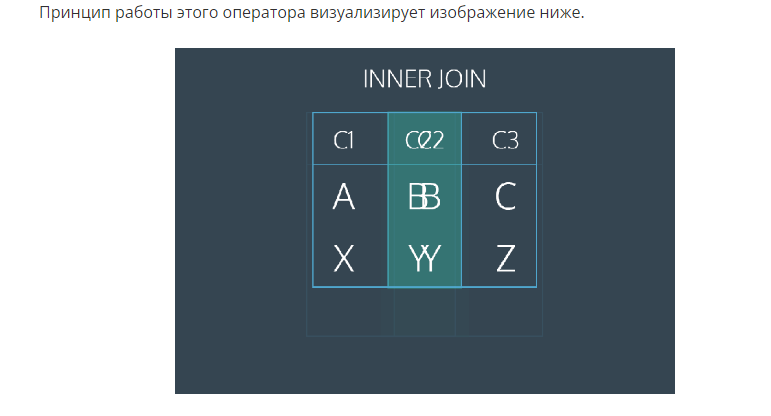

Для INNER JOIN работает следующее правило: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

Рассмотрим на примере нашего датасета. 

В таблице teams есть данные о 299 различных командах — можем проверить это с помощью запроса.

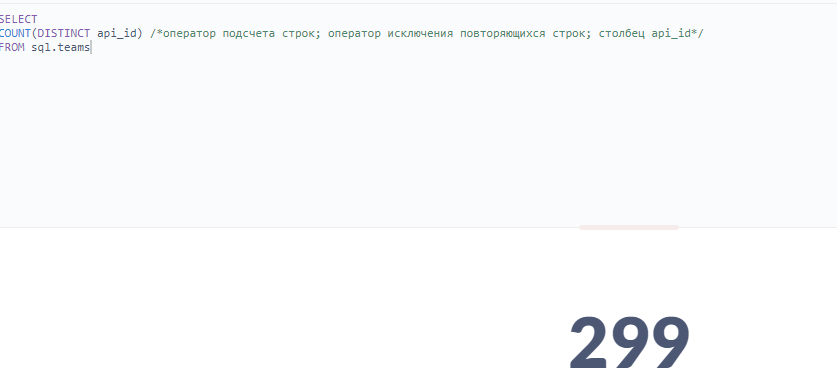

еперь добавим к teams таблицу с матчами.

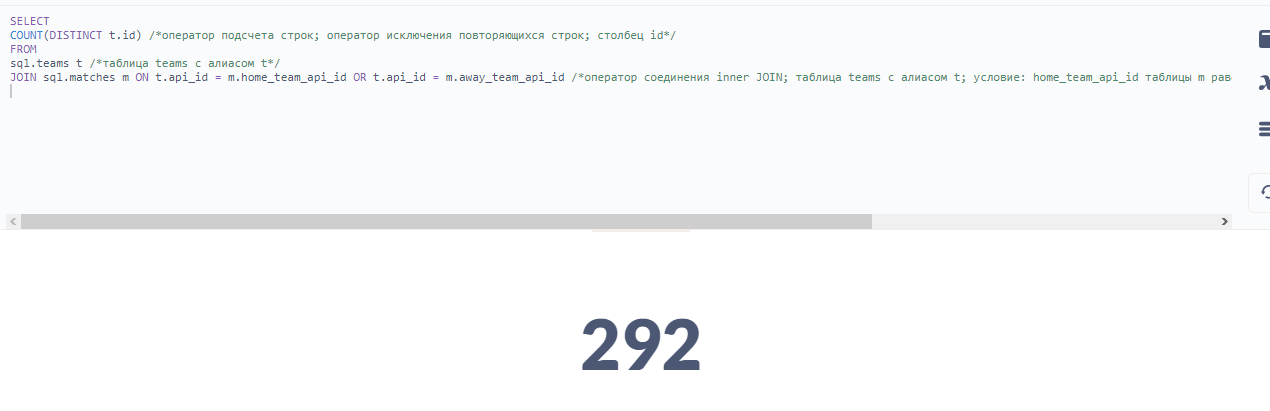

И в таблице останется уже не 299 команд, а только 292. Почему?

Дело в том, что таблица sql.matches по какой-то причине не содержит информацию о командах Lierse SK, KVC Westerlo, KAS Eupen, Club Brugge KV, KV Oostende, RSC Anderlecht и Hull City, зато они есть в таблице sql.teams. Возможно, эти команды не участвовали ни в одном матче или записи по этим матчам были удалены.

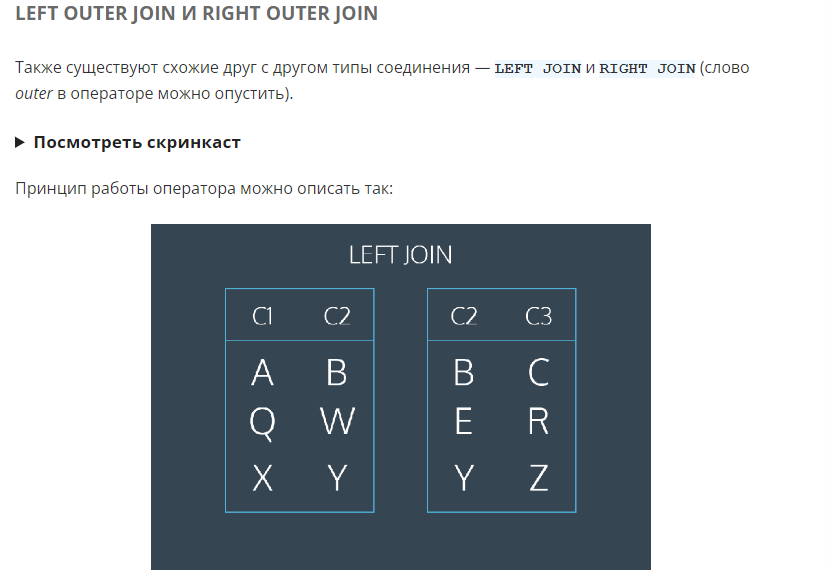

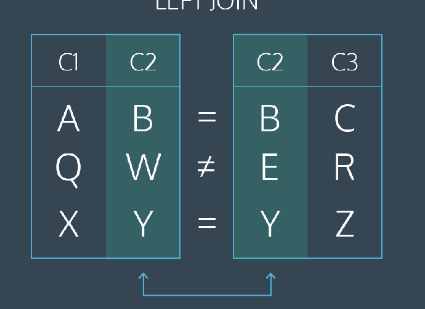

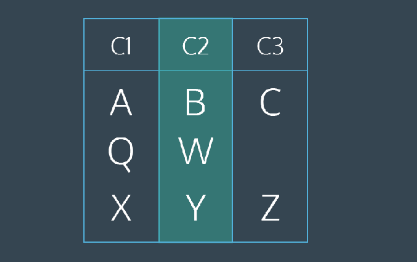

Для LEFT JOIN работает следующее правило: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL.

LEFT JOIN может быть полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

Почему соответствий может не быть? Причины могут быть разные, назовём две основные:



Различная бизнес-логика таблиц.

Пример: в интернет-магазине почти всегда можно оформить заказ с промокодом. Вполне вероятно, что информация о промокодах хранится в отдельной таблице, но при этом не для каждого заказа будет существовать промокод, поскольку покупку можно оформить и без него.

Разное время обновления таблиц.

Пример: клиент зарегистрировался на сайте интернет-магазина и оформил заказ. Данные о регистрации клиентов могут обновляться в базе данных раз в неделю, а о заказах — раз в сутки.

Поставим следующую задачу: вывести полные названия команд, данных по которым нет в таблице matches.

Для начала посмотрим на результат запроса после соединения.

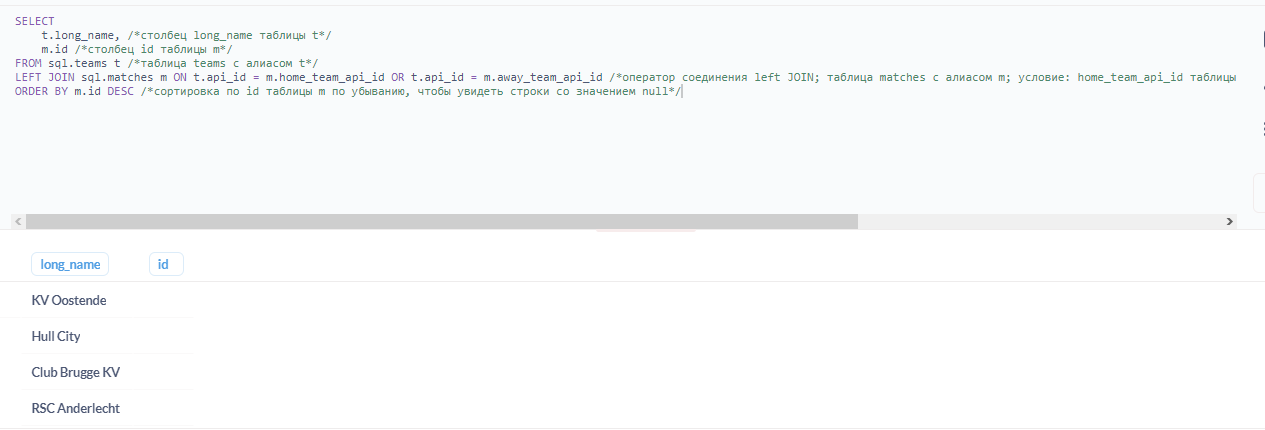

Вывод: таблице teams сохранились все записи, а в таблице matches есть пустые строки.

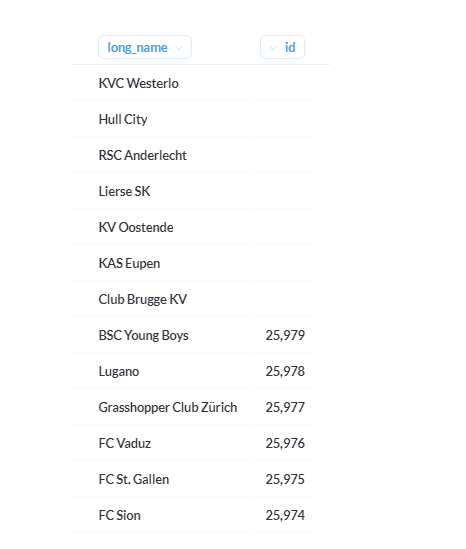

Теперь, чтобы выбрать такие команды, которые не принимали участия в матчах, достаточно добавить условие where m.id is null (или любое другое поле таблицы matches).

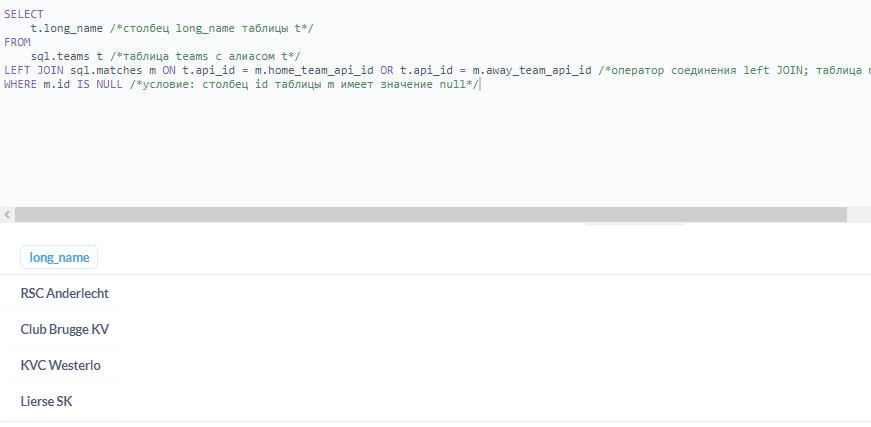

Обратите внимание! Если мы добавим какой-либо фильтр по значению для таблицы matches, то LEFT JOIN превратится в INNER JOIN, поскольку для второй таблицы необходимым станет присутствие значения в строке.

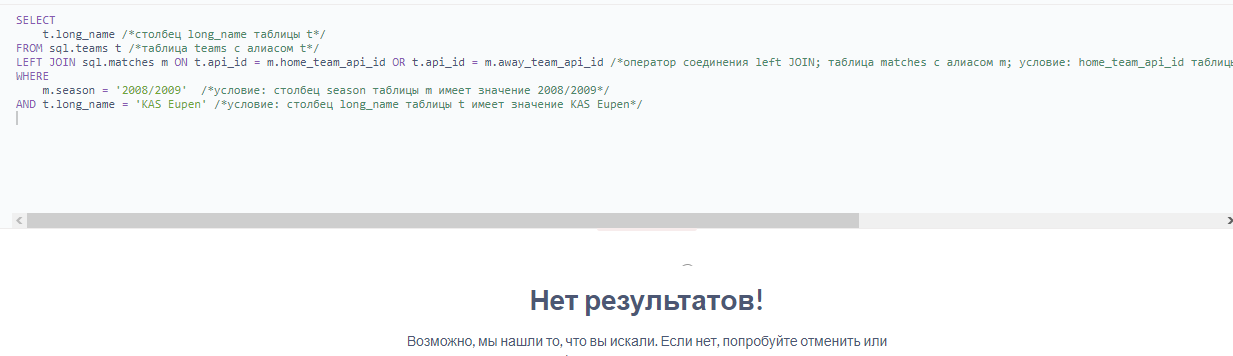

В ответе Metabase получим No results!, так как вместе с фильтром m.season = ‘2008/2009’ исчезли все строки, значения которых NULL.

Используя LEFT JOIN, выведите список уникальных названий команд, содержащихся в таблице matches. Отсортируйте список в алфавитном порядке.

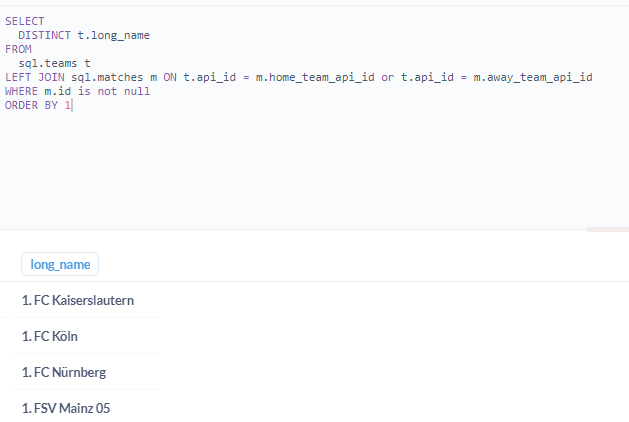

С LEFT JOIN также работают агрегатные функции, что позволяет не потерять значения из левой таблицы. Например, мы можем вывести сумму голов команд по гостевым матчам.

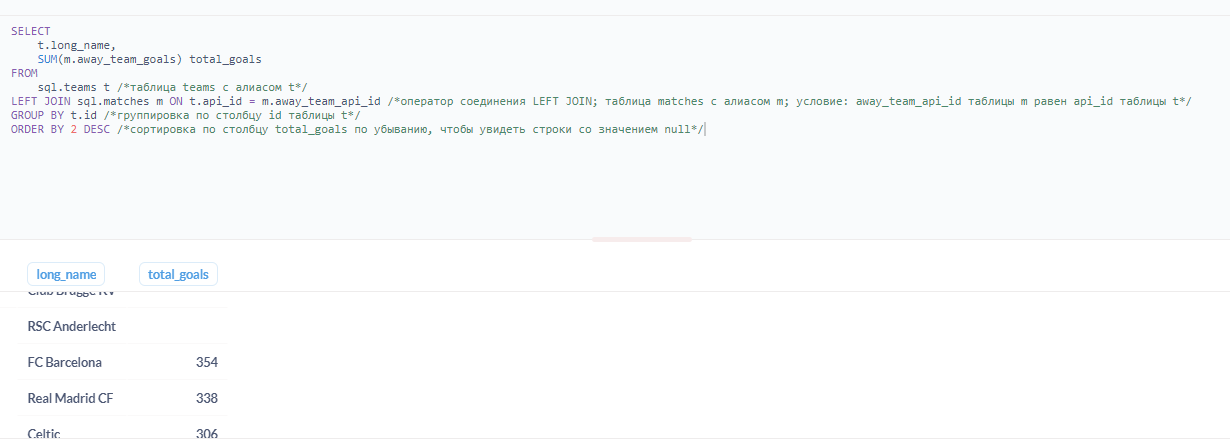

Обратите внимание! При использовании функций SUM, MIN, MAX, AVG к полям со значением NULL в результате получится значение NULL, а не 0. А при использовании функции COUNT, наоборот, получится 0.

Используя LEFT JOIN, напишите запрос, который выведет полное название команды (long_name), количество матчей, в которых участвовала команда, — домашних и гостевых (matches_cnt). Отсортируйте по количеству матчей в порядке возрастания, затем — по названию команды в алфавитном порядке.

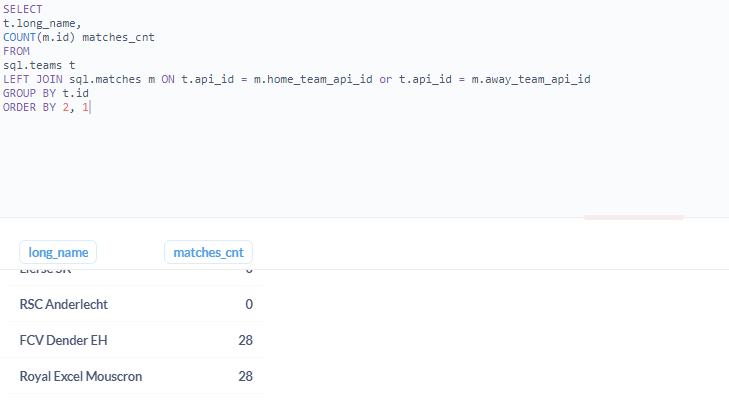

При использовании RIGHT JOIN сохраняется та же логика, что и для LEFT JOIN, только за основу берётся правая таблица.

Чтобы из LEFT JOIN получить RIGHT JOIN, нужно просто поменять порядок соединения таблиц.

Вообще, применение RIGHT JOIN считается плохим тоном, так как язык SQL читается и пишется слева направо, а такой оператор усложняет чтение запросов.

Оператор FULL OUTER JOIN объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

FULL OUTER JOIN может быть полезен в ситуациях, когда схема данных недостаточно нормализована и не хватает таблиц-справочников.

Пример: в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа.

Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать FULL OUTER JOIN для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по id пользователя.

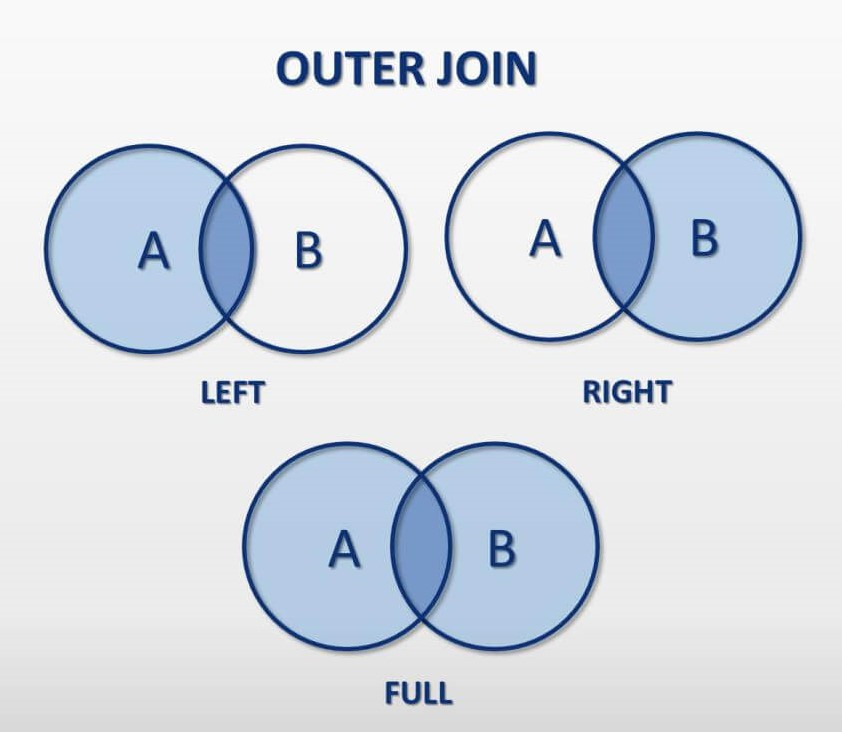

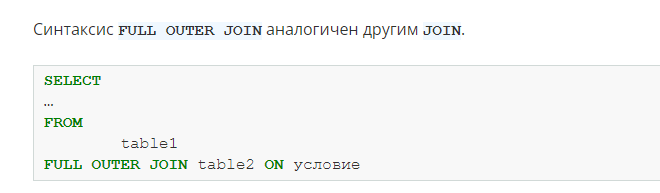

На самом деле с этим оператором соединения таблиц вы познакомились в самом начале текущего модуля. CROSS JOIN соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, даёт декартово произведение.

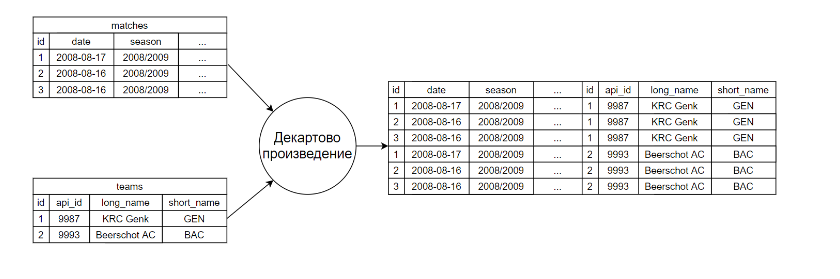

CROSS JOIN может быть полезен, когда вам необходимо создать таблицу фактов.

Например, с помощью такого запроса мы можем получить все возможные комбинации полных названий команд в матчах.

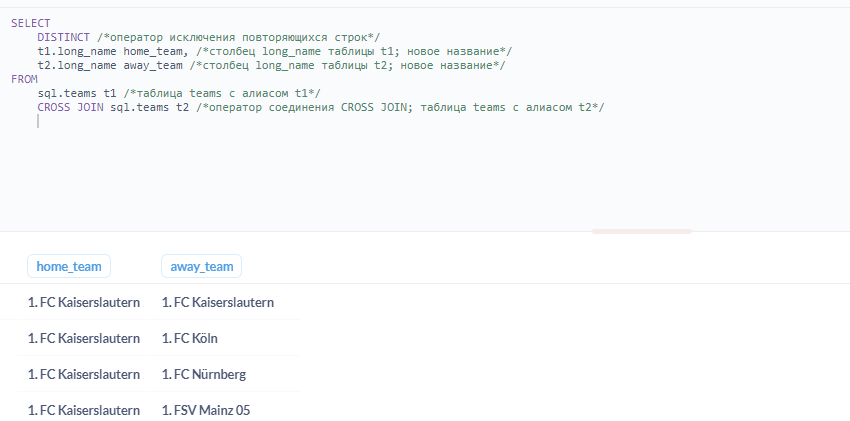

апишите запрос, который выведет все возможные уникальные комбинации коротких названий домашней команды (home_team) и коротких названий гостевой команды (away_team). Отсортируйте запрос по первому и второму столбцам.

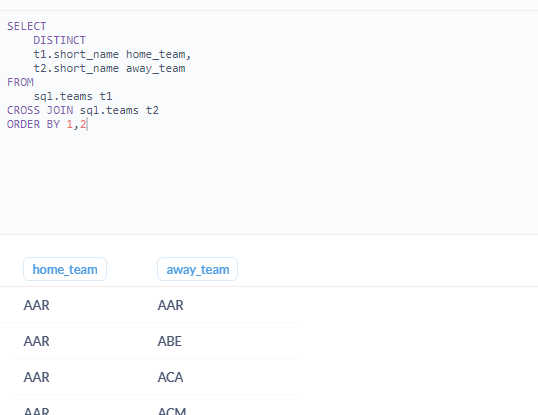

При построении запроса с несколькими JOIN старайтесь идти слева направо. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса.

Например, для ответа на вопрос: «Какая команда сыграла больше всех матчей в сезоне 2010/2011?» в качестве центральной лучше выбрать таблицу с командами.

А для ответа на вопрос: «В каком сезоне участвовало больше всего команд?» — таблицу с матчами.

Стоит отметить, что из рассмотренных видов соединений чаще всего используются INNER JOIN и LEFT JOIN. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.

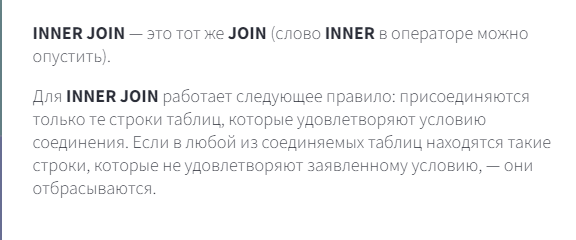

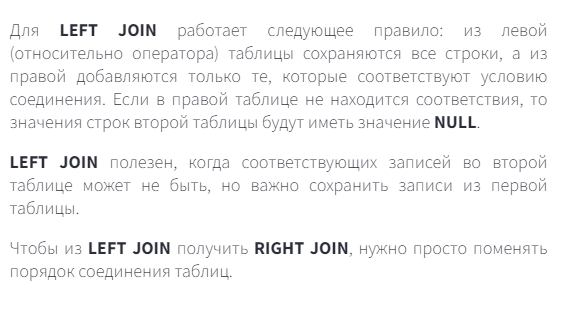

Теперь закрепим полученные знания.

Вам предстоит выполнить пять заданий на написание SQL-запросов по определённым условиям.

Если какую-то задачу не получается выполнить с первого раза — не отчаивайтесь. Соединение таблиц — одна из самых сложных тем для освоения и эффективного использования языка SQL.

Если при выполнении заданий возникли трудности, попробуйте вернуться к материалам и посмотреть примеры запросов для разных задач.

Напишите запрос, который выведет список уникальных полных названий команд (long_name), игравших в гостях в матчах сезона 2012/2013. Отсортируйте список в алфавитном порядке.

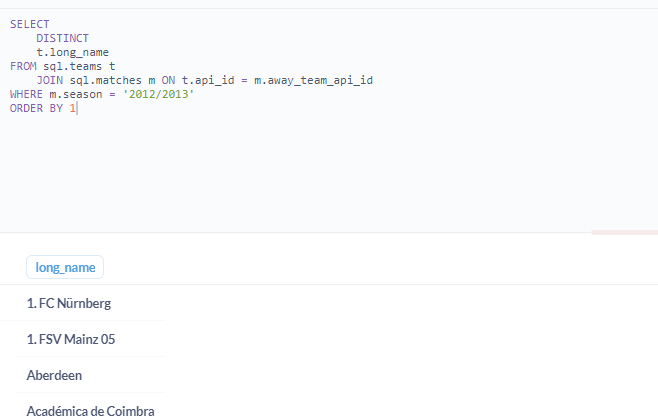

Напишите запрос, который выведет полное название команды (long_name) и общее количество матчей (matches_cnt), сыгранных командой Inter в домашних матчах.

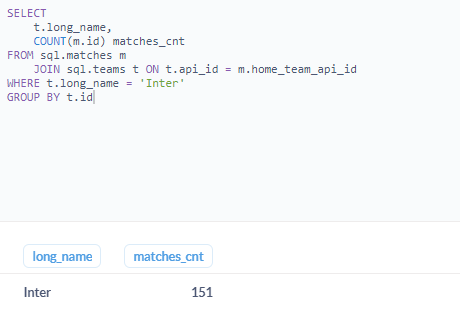

Напишите запрос, который выведет топ-10 команд (long_name) по суммарному количеству забитых голов в гостевых матчах. Во втором столбце запроса выведите суммарное количество голов в гостевых матчах (total_goals).

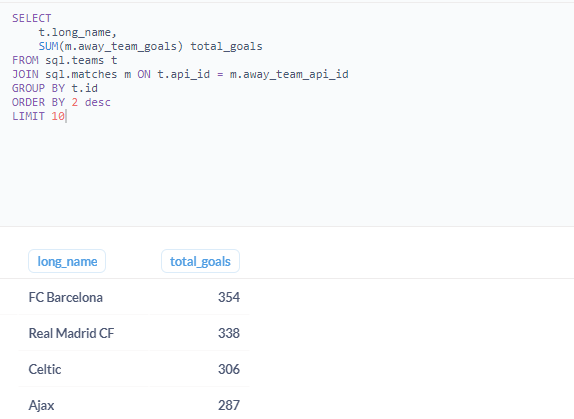

Выведите количество матчей между командами Real Madrid CF и FC Barcelona. В поле ниже введите запрос, с помощью которого вы решили задание.

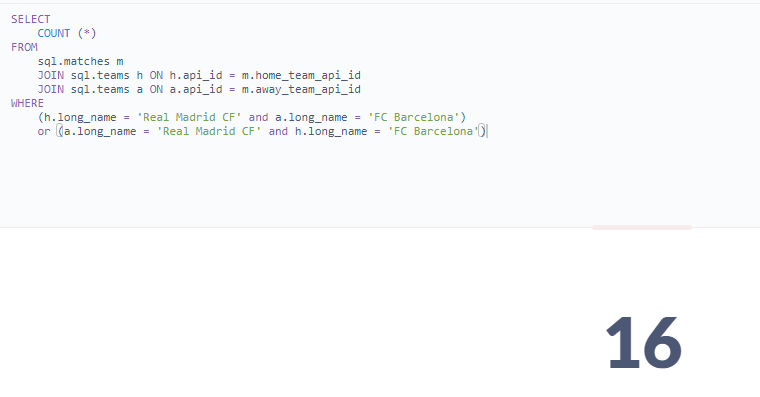

Напишите запрос, который выведет название команды (long_name), сезон (season) и суммарное количество забитых голов в домашних матчах (total_goals). Оставьте только те строки, в которых суммарное количество голов менее десяти. Отсортируйте запрос по названию команды, а затем — по сезону.

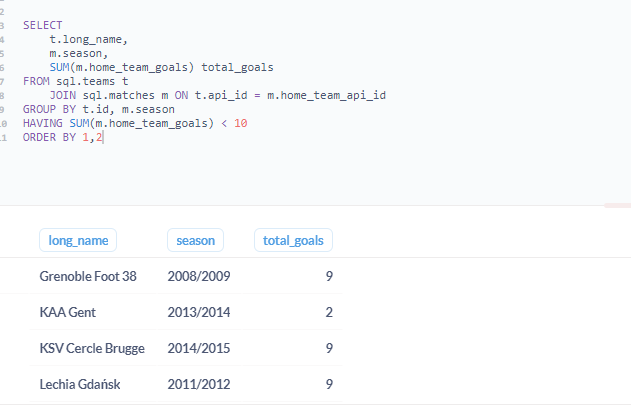

Однако мы предлагаем немного задержаться в этом модуле.

Объединение таблиц — одна из ключевых тем. Знания в этой области нередко проверяют на собеседованиях, поэтому уделите отработке навыков особое внимание. Ниже вы найдёте несколько наиболее распространённых вопросов по объединению таблиц.

Важно! Это задания на самопроверку, они необязательные и мы не будем оценивать качество их решения. Однако настоятельно рекомендуем вам попробовать выполнить их самостоятельно, прежде чем открывать ответ.

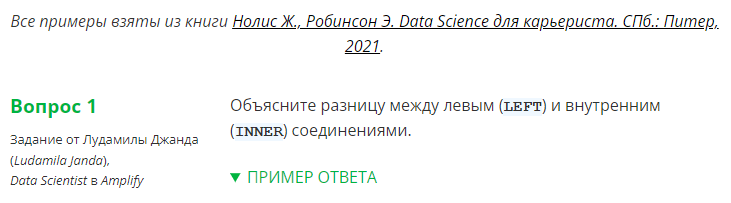

Соединения — это способы объединения данных из двух разных таблиц (левой и правой) в новую.

Принцип работы соединений заключается в объединении строк между двумя таблицами; набор ключевых столбцов используется для поиска данных в двух одинаковых таблицах, которые необходимо соединить.

В случае левого соединения каждая строка из левой таблицы появляется в полученной таблице, но строки из правой появляются, только если значения в их ключевых столбцах отображаются в левой. При внутреннем соединении обе строки из левой и правой таблиц появляются, только если есть совпадающая строка в другой таблице.

На практике вы можете воспринимать левое соединение как добавление данных из правой таблицы к левой, если она существует (например, с использованием правой таблицы в качестве подстановочной). Внутреннее соединение больше похоже на поиск всех общих данных и создание новой таблицы только из пар.

https://www.litres.ru/zhaklin-nolis/data-science-dlya-karerista/

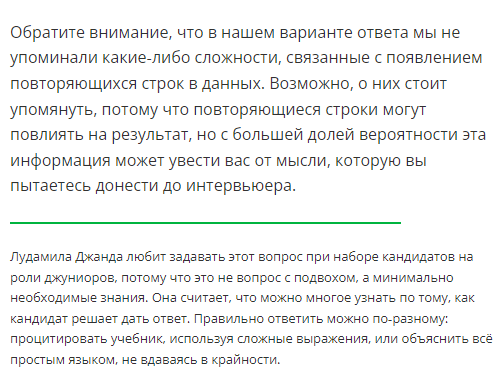

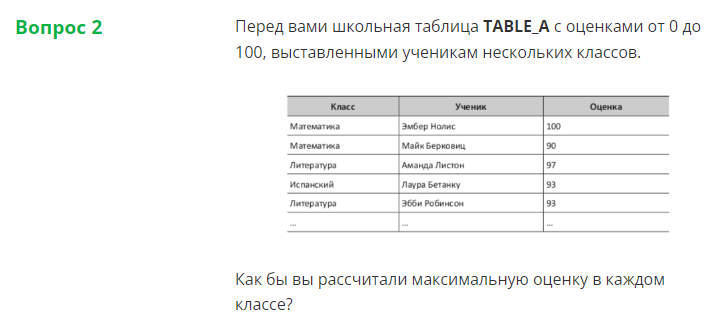

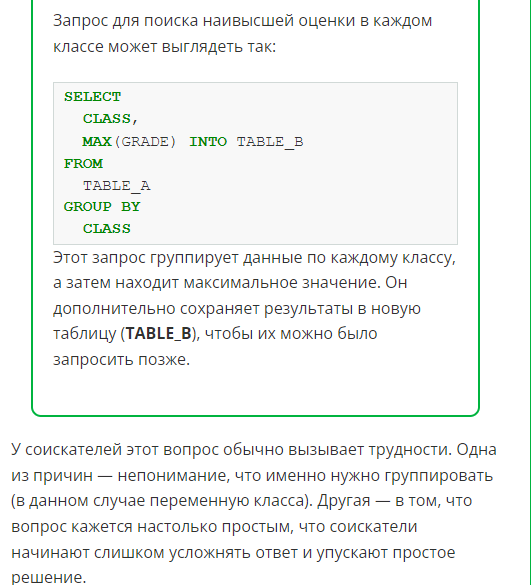

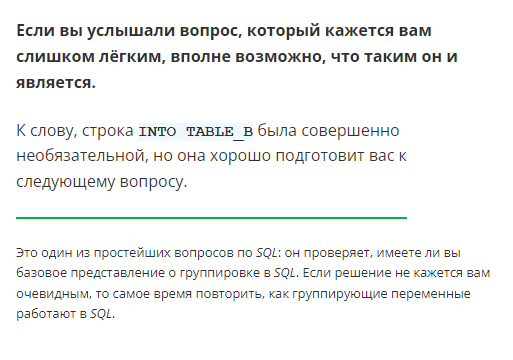

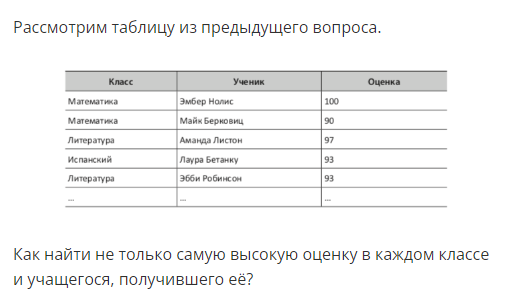

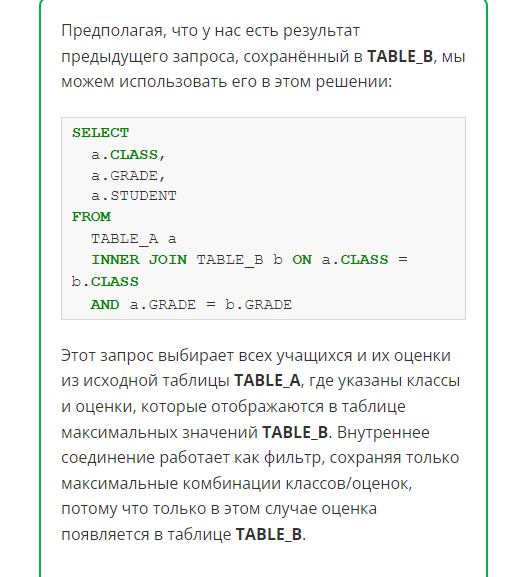

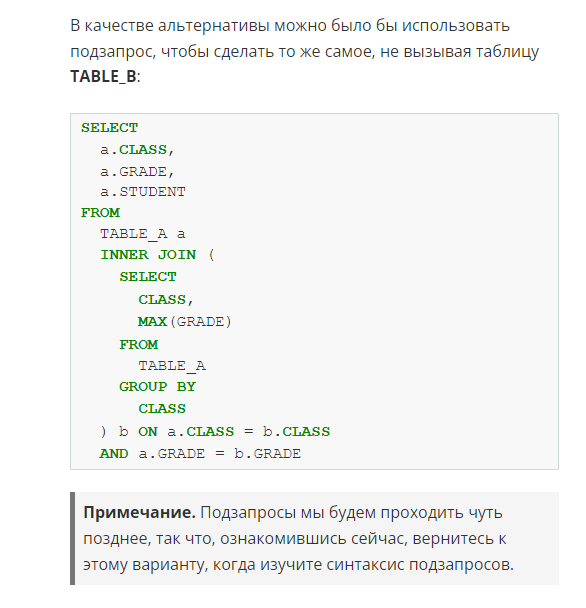

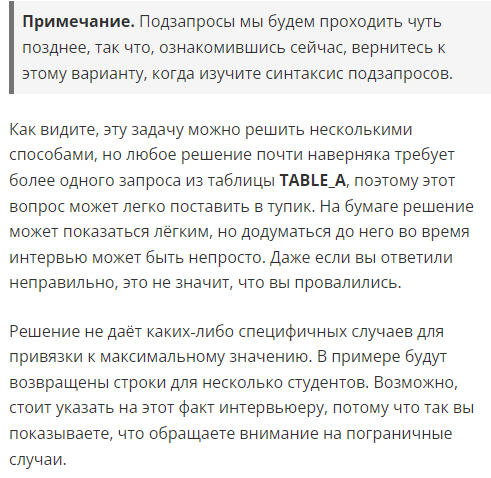